In [7]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [19]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [20]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [21]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [22]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [23]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [24]:
# Find the most recent date in the data set.
recent=(session.query(Measurement.date)
        .order_by(Measurement.date.desc())
        .first())
recent

('2017-08-23',)

In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
recent_year=dt.date(2017, 8, 23) - dt.timedelta(days=366)
print('Query Date:', recent_year)


# Perform a query to retrieve the data and precipitation scores

year_prec=(session.query(Measurement.date,func.max(Measurement.prcp))
        .filter(func.strftime('%Y-%m-%d',Measurement.date) > recent_year)
        .group_by(Measurement.date)
        .all())
year_prec

prec_df=pd.DataFrame(year_prec, columns=['Date', 'Precipitation'])
prec_df.set_index('Date',inplace=True)
prec_df.head

# Save the query results as a Pandas DataFrame and set the index to the date column
prec_df=pd.DataFrame(year_prec, columns=['Date', 'Precipitation'])
prec_df.set_index('Date',inplace=True)
prec_df.head

# Sort the dataframe by date
prec_df.sort_values('Date')

Query Date: 2016-08-22


,Precipitation
Date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.56


In [70]:
year_prec

[('2016-08-23', 1.79),
 ('2016-08-24', 2.28),
 ('2016-08-25', 0.21),
 ('2016-08-26', 0.04),
 ('2016-08-27', 0.18),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.02),
 ('2016-09-02', 0.19),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.74),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.22),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),
 ('2016-09-14', 6.7),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.36),
 ('2016-09-18', 0.42),
 ('2016-09-19', 0.25),
 ('2016-09-20', 0.43),
 ('2016-09-21', 1.02),
 ('2016-09-22', 0.75),
 ('2016-09-23', 0.94),
 ('2016-09-24', 0.27),
 ('2016-09-25', 0.04),
 ('2016-09-26', 1.02),
 ('2016-09-27', 1.0),
 ('2016-09-28', 0.08),
 ('2016-09-29', 1.49),
 ('2016-09-30', 0.38),
 ('2016-10-01', 1.02),
 ('2016-10-02', 0.61),
 ('2016-10-03', 0.46),
 ('2016-10-04', 3.46),
 ('2016-10-05', 0.

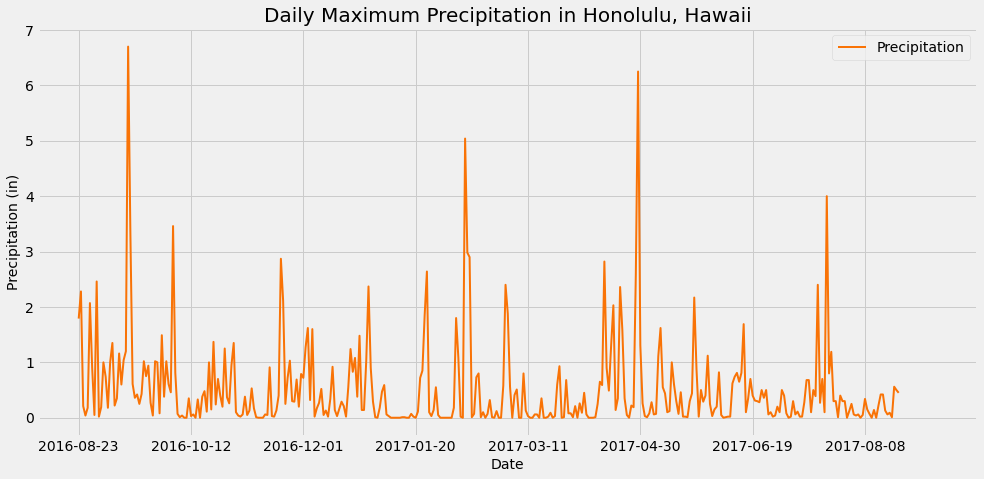

In [44]:
# Use Pandas Plotting with Matplotlib to plot the data
prec_df.plot(linewidth=2,alpha=1,rot=0, 
             xticks=(0,50,100,150,200,250,300,350,400),
             color='xkcd:orange')

plt.xlabel('Date',fontsize=14)
plt.ylabel('Precipitation (in)',fontsize=14)
plt.title('Daily Maximum Precipitation in Honolulu, Hawaii',fontsize=20)

plt.show()

In [72]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_df.describe()

,Precipitation
count,366.000000
mean,0.520765
std,0.830728
min,0.000000
25%,0.040000
50%,0.250000
75%,0.672500
max,6.700000


# Exploratory Station Analysis

In [55]:
# Design a query to calculate the total number stations in the dataset
stations=session.query(Station).count()
print(f'There are {stations} stations in Honolulu, Hawaii.')

There are 9 stations in Honolulu, Hawaii.


In [56]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations=(session.query(Measurement.station,func.count(Measurement.station))
                .group_by(Measurement.station)
                .order_by(func.count(Measurement.station).desc())
                .all())
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [59]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tobs=[Measurement.station, 
    func.min(Measurement.tobs), 
    func.max(Measurement.tobs), 
    func.avg(Measurement.tobs)]

most_active=(session.query(*active)
    .filter(Measurement.station=='USC00519281')
    .all())
most_active

most_active_temp=pd.DataFrame(most_active, columns=['station', 'min_temp', 'max_temp', 'avg_temp'])
most_active_temp.set_index('station', inplace=True)
most_active_temp

,min_temp,max_temp,avg_temp
station,,,
USC00519281,54.0,85.0,71.663781


In [76]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

year_temp=(session.query(Measurement.tobs)
            .filter(func.strftime(Measurement.date) > recent_year)
            .filter(Measurement.station=='USC00519281')
            .all())
year_temp



[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


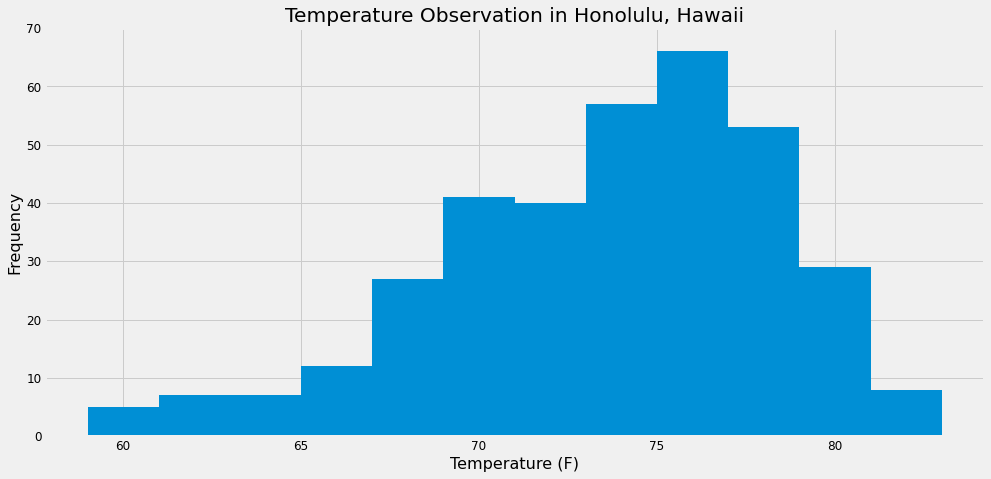

In [80]:
temp_df=pd.DataFrame(year_temp, columns=["tobs"])

plt.hist(temp_df['tobs'],bins=12)
plt.title('Temperature Observation in Honolulu, Hawaii')
plt.xlabel('Temperature (F)',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,70)

plt.show()

# Close session

In [81]:
# Close Session
session.close()